## Linear Regression - Predicting a new employee's 'Salary' from their 'Years of Experience'

### The Business Challenge:
We need to know which salary to assign to a person depending on how many years of experience they have in the business.
We have a prospective employee with 5 years of experience, and we need to know how much we should pay them.

Based on the data we have about 30 employees; their Years of Experience and their Salary, can we predict an employee's Salary only given their Years of Experience?

#### Import the libraries
Preprocessing

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split

Visualisation

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Import the dataset
We are wanting to predict the Salary using the Years of Experience, so:

Set the independent variable 'X' as "Years of Experience"

Set the dependent variable 'y' as "Salary"


In [3]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset ['YearsExperience'].values.reshape(-1,1)
y = dataset ['Salary'].values.reshape(-1,1)

Let's also get a summary of what X and y look like:

In [4]:
print ( 'Xsize =',X.size,'\n',
        'Xshape =',X.shape,'\n','\n',
       
        'Xhead =\n',X[0:5],'\n','\n',
       
        'ysize =',y.size,'\n',
        'yshape =',y.shape,'\n','\n',
      
        'yhead = \n',y[0:5]
      )

Xsize = 30 
 Xshape = (30, 1) 
 
 Xhead =
 [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]] 
 
 ysize = 30 
 yshape = (30, 1) 
 
 yhead = 
 [[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]]


It looks like they've been assigned properly, and there is 30 rows of data.

Now let's split the data into the Training set and Test set, Train size will be 20 rows, Test will be 10 (1/3 split)

#### Train test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

In [6]:
print(X_train.size,',', y_train.size)

20 , 20


In [7]:
print(X_test.size,',', y_test.size)

10 , 10


#### Fitting the Linear Regression model to the Training set

In [8]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Checking the model's R^2 Score

In [9]:
regressor.score(X_test,y_test)

0.97491544077083525

That's a very high correlation there.

In [10]:
regressor.score(X_train,y_train)

0.93819000128942776

Also very high. I'm confident we are able to predict the Salary - Let's continue.
#### Making the predictions

In [11]:
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

#### Visualising the predictions

Visualising the training set

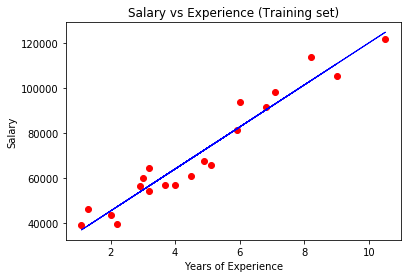

In [12]:
plt.scatter(X_train,y_train, color ='red')
plt.plot(X_train, y_pred_train, color ='blue',linewidth = 1)
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Visualising the test set

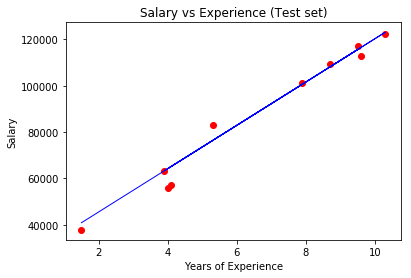

In [13]:
plt.scatter(X_test,y_test, color ='red')
plt.plot(X_test, regressor.predict(X_test), color ='blue',linewidth = 1)
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

#### Observations

As you can see above, the blue line is our predictions and the red dots are the actual data points.

In both the training and test sets, the data fits very well considering the Linear Regression assumptions.


This Linear Regression model assumes:

- that the relationship is perfectly linear

- that the data is normally distributed

- that the data is homoscedastic (all random variables have the same finite variance)

#### Prediction
Lastly, let's get the answer to our initial question:
How much should the new employee's salary (who has 5 years of experience) be?

In [14]:
print(regressor.predict(5))

[[ 73545.90445964]]


Our model predicts the employee should be earning $73,545,90 a year.